In [7]:
#!pip install tensorflow

In [8]:
import warnings

In [11]:
data

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


X_train shape: (4, 10)
y_train shape: (4, 3)
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 1.1560 - val_accuracy: 0.0000e+00 - val_loss: 1.1154
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.0000e+00 - loss: 1.1246 - val_accuracy: 0.0000e+00 - val_loss: 1.1231
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.0000e+00 - loss: 1.0947 - val_accuracy: 0.0000e+00 - val_loss: 1.1306
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.2500 - loss: 1.0668 - val_accuracy: 0.0000e+00 - val_loss: 1.1378
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5000 - loss: 1.0400 - val_accuracy: 0.0000e+00 - val_loss: 1.1449
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7500 - loss: 1.0149 - val_accuracy: 0.0000e+00 - val_loss: 1.1519
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7500 - loss: 0.9911 - val_accuracy: 0.0000e+00 - val_loss: 1.1586
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 

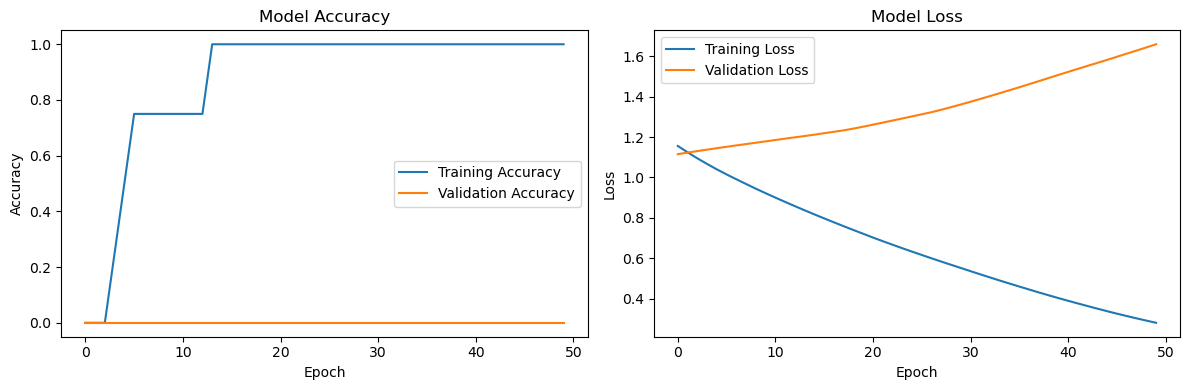

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Test texts: ['This product is amazing!', 'I hate this service', "It's neither good nor bad"]
Predictions: ['neutral' 'neutral' 'positive' ... 'positive' 'positive' 'positive']


In [14]:
warnings.filterwarnings('ignore')
import pandas as pd

# Load the IMDB dataset
data = pd.read_csv(r"C:\Users\raswa\OneDrive\Desktop\IMDB Dataset.csv")

# Rename columns to match your code's structure
data.columns = ['text', 'sentiment']
all_classes = ['positive', 'negative', 'neutral']
label_encoder = LabelEncoder()
label_encoder.fit(all_classes)


y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


y_train_categorical = to_categorical(y_train_encoded, num_classes=len(all_classes))
y_test_categorical = to_categorical(y_test_encoded, num_classes=len(all_classes))


print("X_train shape:", X_train_vectorized.shape)
print("y_train shape:", y_train_categorical.shape)


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_vectorized.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(all_classes), activation='softmax')  # Output layer matches number of classes
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    X_train_vectorized, y_train_categorical,
    validation_data=(X_test_vectorized, y_test_categorical),
    epochs=50,
    batch_size=32,
    verbose=1
)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


test_vectorized = vectorizer.transform(data['text']).toarray()
predictions = model.predict(test_vectorized)
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

print("Test texts:", test_texts)
print("Predictions:", predicted_labels)
